In [1]:
import requests
from bs4 import BeautifulSoup
import re
import pandas as pd
url = 'http://quotes.toscrape.com/'

# Function

In [2]:
def input_file(file, soup):
    f = open(file, 'w', encoding='utf-8')
    f.write(soup.prettify())
    f.close()


In [3]:
def input_file_2(authors, links, birthdates, texts):
    # f = open(file, 'a+')
    data = pd.DataFrame(columns=['Tacgia', 'Link', 'Namsinh', 'Quote'])
    
    for i in range(len(links)):
        data.loc[i] = [authors[i],str(links[i]), str(birthdates[i]),  str(texts[i])]
    data.to_csv(r'D:\IntroDS\final_project\Bai3\Quotes.csv')
def tacgiaLink(results, authors,texts,birthdates, links):
    for result in results:
        author = result.find('small', class_='author')
        authors.append(author.text)
        text = result.find('span', class_='text')
        texts.append(text.text)
        link = result.find_all('a',{'href' : re.compile("/author/.+")})
        url_sub = 'http://quotes.toscrape.com/'
        url_sub = url_sub+str(link[0]['href'])
        links.append(url_sub)
        page_sub = requests.get(url_sub)
        soup_sub = BeautifulSoup(page_sub.text, 'html.parser')
        birthdate = soup_sub.find('span', class_='author-born-date')
        if birthdate is None:
            birthdates.append('Unknown')
        else:
            birthdates.append(birthdate.text)
        print(str(author.text) + '\t' + str(url_sub) + '\t' + str(birthdate.text) + '\t' + str(text.text))
    return authors,texts,birthdates, links
    

# Cau 3.1.1

In [4]:
html = requests.get(url)
soup = BeautifulSoup(html.text, 'html.parser')
input_file('kq.txt', soup)


Trang web này được gọi là "Quotes to Scrape".
Trang web có một tiêu đề, một thanh điều hướng trên đầu trang và phần thân của trang được chia thành hai cột. Cột bên trái chứa danh sách trích dẫn và cột bên phải có một hình ảnh và mô tả về trang web. Cuối trang web là chân trang chứa thông tin về tác giả và liên kết đến trang login. Cấu trúc của trang web được viết bằng ngôn ngữ đánh dấu siêu văn bản HTML và được định dạng bằng CSS.

# Cau 3.1.2

* a

In [5]:
results = soup.find_all('div', class_='quote')
print(results)



[<div class="quote" itemscope="" itemtype="http://schema.org/CreativeWork">
<span class="text" itemprop="text">“The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”</span>
<span>by <small class="author" itemprop="author">Albert Einstein</small>
<a href="/author/Albert-Einstein">(about)</a>
</span>
<div class="tags">
            Tags:
            <meta class="keywords" content="change,deep-thoughts,thinking,world" itemprop="keywords"/>
<a class="tag" href="/tag/change/page/1/">change</a>
<a class="tag" href="/tag/deep-thoughts/page/1/">deep-thoughts</a>
<a class="tag" href="/tag/thinking/page/1/">thinking</a>
<a class="tag" href="/tag/world/page/1/">world</a>
</div>
</div>, <div class="quote" itemscope="" itemtype="http://schema.org/CreativeWork">
<span class="text" itemprop="text">“It is our choices, Harry, that show what we truly are, far more than our abilities.”</span>
<span>by <small class="author" itemprop="author">J.K.

* b 

In [6]:
authors = []
for result in results:
    author = result.find('small', class_='author')
    authors.append(author.text)
# for i in range(len(authors)):
    # print('Author:',authors[i])


* c

In [7]:
authors = []
texts = []
birthdates = []
links = []
tacgiaLink(results, authors,texts,birthdates, links)

Albert Einstein	http://quotes.toscrape.com//author/Albert-Einstein	March 14, 1879	“The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”
J.K. Rowling	http://quotes.toscrape.com//author/J-K-Rowling	July 31, 1965	“It is our choices, Harry, that show what we truly are, far more than our abilities.”
Albert Einstein	http://quotes.toscrape.com//author/Albert-Einstein	March 14, 1879	“There are only two ways to live your life. One is as though nothing is a miracle. The other is as though everything is a miracle.”
Jane Austen	http://quotes.toscrape.com//author/Jane-Austen	December 16, 1775	“The person, be it gentleman or lady, who has not pleasure in a good novel, must be intolerably stupid.”
Marilyn Monroe	http://quotes.toscrape.com//author/Marilyn-Monroe	June 01, 1926	“Imperfection is beauty, madness is genius and it's better to be absolutely ridiculous than absolutely boring.”
Albert Einstein	http://quotes.toscrape.com//author/Albe

(['Albert Einstein',
  'J.K. Rowling',
  'Albert Einstein',
  'Jane Austen',
  'Marilyn Monroe',
  'Albert Einstein',
  'André Gide',
  'Thomas A. Edison',
  'Eleanor Roosevelt',
  'Steve Martin'],
 ['“The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”',
  '“It is our choices, Harry, that show what we truly are, far more than our abilities.”',
  '“There are only two ways to live your life. One is as though nothing is a miracle. The other is as though everything is a miracle.”',
  '“The person, be it gentleman or lady, who has not pleasure in a good novel, must be intolerably stupid.”',
  "“Imperfection is beauty, madness is genius and it's better to be absolutely ridiculous than absolutely boring.”",
  '“Try not to become a man of success. Rather become a man of value.”',
  '“It is better to be hated for what you are than to be loved for what you are not.”',
  "“I have not failed. I've just found 10,000 ways that won't wor

* d

In [8]:
authors = []
texts = []
birthdates = []
links = []
pape = soup
for i in range(1, 10000):
    url= 'http://quotes.toscrape.com/page/'+str(i)+'/'
    html = requests.get(url)
    soup_sub = BeautifulSoup(html.text, 'html.parser')
    results = soup_sub.find_all('div', class_='quote')
    if len(results) == 0:
        input_file_2(authors, links, birthdates, texts)
        break
    # print(url)
    authors,texts,birthdates, links =  tacgiaLink(results, authors,texts,birthdates, links)
    print(f'########################{i}############################')


Albert Einstein	http://quotes.toscrape.com//author/Albert-Einstein	March 14, 1879	“The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”
J.K. Rowling	http://quotes.toscrape.com//author/J-K-Rowling	July 31, 1965	“It is our choices, Harry, that show what we truly are, far more than our abilities.”
Albert Einstein	http://quotes.toscrape.com//author/Albert-Einstein	March 14, 1879	“There are only two ways to live your life. One is as though nothing is a miracle. The other is as though everything is a miracle.”
Jane Austen	http://quotes.toscrape.com//author/Jane-Austen	December 16, 1775	“The person, be it gentleman or lady, who has not pleasure in a good novel, must be intolerably stupid.”
Marilyn Monroe	http://quotes.toscrape.com//author/Marilyn-Monroe	June 01, 1926	“Imperfection is beauty, madness is genius and it's better to be absolutely ridiculous than absolutely boring.”
Albert Einstein	http://quotes.toscrape.com//author/Albe

# 3.2. Khai phá dữ liệu (35 điểm)

In [9]:
# include 
import pandas as pd
import numpy as np
import matplotlib_inline as plt
import plotly.express as px
import seaborn as sns
from datetime import datetime


In [10]:
meta = pd.read_csv(r'Quotes.csv', encoding='utf-8', index_col='Unnamed: 0')
meta

,Tacgia,Link,Namsinh,Quote
0,Albert Einstein,http://quotes.toscrape.com//author/Albert-Eins...,"March 14, 1879",“The world as we have created it is a process ...
1,J.K. Rowling,http://quotes.toscrape.com//author/J-K-Rowling,"July 31, 1965","“It is our choices, Harry, that show what we t..."
2,Albert Einstein,http://quotes.toscrape.com//author/Albert-Eins...,"March 14, 1879",“There are only two ways to live your life. On...
3,Jane Austen,http://quotes.toscrape.com//author/Jane-Austen,"December 16, 1775","“The person, be it gentleman or lady, who has ..."
4,Marilyn Monroe,http://quotes.toscrape.com//author/Marilyn-Monroe,"June 01, 1926","“Imperfection is beauty, madness is genius and..."
...,...,...,...,...
95,Harper Lee,http://quotes.toscrape.com//author/Harper-Lee,"April 28, 1926",“You never really understand a person until yo...
96,Madeleine L'Engle,http://quotes.toscrape.com//author/Madeleine-L...,"November 29, 1918",“You have to write the book that wants to be w...
97,Mark Twain,http://quotes.toscrape.com//author/Mark-Twain,"November 30, 1835",“Never tell the truth to people who are not wo...
98,Dr. Seuss,http://quotes.toscrape.com//author/Dr-Seuss,"March 02, 1904","“A person's a person, no matter how small.”"


In [11]:
# convert Namsinh to date
meta.Namsinh = meta.Namsinh.apply(lambda x: datetime.strptime(x, "%B %d, %Y").date())
meta.Namsinh = meta.Namsinh.apply(lambda x: pd.to_datetime(x))
meta['Tacgia'] = meta['Tacgia'].astype(str)
meta['Link'] = meta['Link'].astype(str)
meta['Quote'] = meta['Quote'].astype(str)
meta

,Tacgia,Link,Namsinh,Quote
0,Albert Einstein,http://quotes.toscrape.com//author/Albert-Eins...,1879-03-14,“The world as we have created it is a process ...
1,J.K. Rowling,http://quotes.toscrape.com//author/J-K-Rowling,1965-07-31,"“It is our choices, Harry, that show what we t..."
2,Albert Einstein,http://quotes.toscrape.com//author/Albert-Eins...,1879-03-14,“There are only two ways to live your life. On...
3,Jane Austen,http://quotes.toscrape.com//author/Jane-Austen,1775-12-16,"“The person, be it gentleman or lady, who has ..."
4,Marilyn Monroe,http://quotes.toscrape.com//author/Marilyn-Monroe,1926-06-01,"“Imperfection is beauty, madness is genius and..."
...,...,...,...,...
95,Harper Lee,http://quotes.toscrape.com//author/Harper-Lee,1926-04-28,“You never really understand a person until yo...
96,Madeleine L'Engle,http://quotes.toscrape.com//author/Madeleine-L...,1918-11-29,“You have to write the book that wants to be w...
97,Mark Twain,http://quotes.toscrape.com//author/Mark-Twain,1835-11-30,“Never tell the truth to people who are not wo...
98,Dr. Seuss,http://quotes.toscrape.com//author/Dr-Seuss,1904-03-02,"“A person's a person, no matter how small.”"


## 3.2.1. Xử lý dữ liệu- Data Imputation (3 điểm):


In [12]:
# Bạn hãy thêm vào Trường STT và điền tự động dữ liệu của trường này?

meta['STT'] = list(range(len(meta)))
meta.head(3)

,Tacgia,Link,Namsinh,Quote,STT
0,Albert Einstein,http://quotes.toscrape.com//author/Albert-Eins...,1879-03-14,“The world as we have created it is a process ...,0
1,J.K. Rowling,http://quotes.toscrape.com//author/J-K-Rowling,1965-07-31,"“It is our choices, Harry, that show what we t...",1
2,Albert Einstein,http://quotes.toscrape.com//author/Albert-Eins...,1879-03-14,“There are only two ways to live your life. On...,2


**Một số giá trị của dữ liệu Trường ngày sinh chưa có, bạn hãy đề xuất cách điền?**

+ ***Cách thứ 1***: em thấy dữ liệu này là tên các người nổi tiếng vì thế thông tin của nó đa số sẽ được publish ở trên mạng. Trường hợp nếu trên mạng không có thì chúng em sẽ lấy strimmed median của ngày sinh đã có
+ ***Cách thứ 2***: sử dụng chat GPT api hiện tại để lấy thông tin (10,000 tokens/tháng) 

--> Nếu gặp tình huống này nhóm em sẽ chọn cách thứ 1

In [13]:
# Kiểm tra có ngày sinh nào null ko
meta.Namsinh.isnull().sum()

0

**Đề xuất cách điền tuổi của các tác giả?**

+ ***Cách thứ 1***: Đối với việc thay thế các dữ liệu thiếu thì có rất nhiều cách để điền điển hình như là mean, 
median nhưng với 2 tham số này thì rất dễ bị bias vì thế chúng ta có thêm các là lấy strimmed mean, strimmed median
thì sẽ giảm bị bias
+ ***Cách thứ 2***: em thấy dữ liệu này là tên các người nổi tiếng vì thế thông tin của nó đa số sẽ được publish ở trên
mạng. Trường hợp nếu trên mạng không có thì chúng em sẽ lấy strimmed median của các độ tuổi đã có
+ ***Cách thứ 3***: sử dụng selenium để lấy tuổi

--> Nếu gặp tình huống này nhóm em sẽ chọn cách thứ 3

In [14]:
ages = {}

In [15]:
for i in meta.Tacgia.unique():
    ages[i] = -1

In [16]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.keys import Keys
import time
from random import randint
driver = webdriver.Chrome()

In [17]:
# Get born  author
for i in  range(len(meta)):
    if ages[meta.Tacgia[i]] != -1: continue
    driver.get('https://www.google.com.vn/?hl=vi')
    input_element = driver.find_element(By.XPATH, "//*[@id='APjFqb']")
    input_element.send_keys(f'how old is author {meta.Tacgia[i]}' + Keys.ENTER)
    age = driver.find_element(By.XPATH, '//*[@id="rso"]/div[1]/div/block-component/div/div[1]/div[1]/div/div/div[1]/div/div/div[1]/div/div[1]/div[2]/div/div[1]').text.replace(' tuổi', '')
    born = driver.find_element(By.XPATH, '//*[@id="rso"]/div[1]/div/block-component/div/div[1]/div[1]/div/div/div[1]/div/div/div[1]/div/div[1]/div[2]/div/div[2]/div').text.split('–')[0]
    
    if len(born) <= 4:
        
        if meta.Namsinh[i].year != int(born):
            print(f'{meta.Link[i]}')
            age = None
        ages[meta.Tacgia[i]] = age
    else:
        born = driver.find_element(By.XPATH, '//*[@id="rso"]/div[1]/div/block-component/div/div[1]/div[1]/div/div/div[1]/div/div/div[1]/div/div[1]/div[2]/div/div[2]/div').text.split(',')[1]
        if meta.Namsinh[i].year != int(born):
            print(f'{meta.Link[i]}')
            age = None
        ages[meta.Tacgia[i]] = age
    print(f'{meta.Tacgia[i]} --> Done')
    time.sleep(randint(2, 6))
driver.quit()

Albert Einstein --> Done
J.K. Rowling --> Done
Jane Austen --> Done
Marilyn Monroe --> Done
André Gide --> Done
Thomas A. Edison --> Done
Eleanor Roosevelt --> Done
Steve Martin --> Done
Bob Marley --> Done
Dr. Seuss --> Done
Douglas Adams --> Done
Elie Wiesel --> Done
Friedrich Nietzsche --> Done
Mark Twain --> Done
Allen Saunders --> Done
Pablo Neruda --> Done
Ralph Waldo Emerson --> Done
Mother Teresa --> Done
Garrison Keillor --> Done
Jim Henson --> Done
Charles M. Schulz --> Done
William Nicholson --> Done
Jorge Luis Borges --> Done
George Eliot --> Done
George R.R. Martin --> Done
C.S. Lewis --> Done
Martin Luther King Jr. --> Done
James Baldwin --> Done
Haruki Murakami --> Done
Alexandre Dumas fils --> Done
Stephenie Meyer --> Done
Ernest Hemingway --> Done
Helen Keller --> Done
George Bernard Shaw --> Done
Charles Bukowski --> Done
Suzanne Collins --> Done
J.R.R. Tolkien --> Done
Alfred Tennyson --> Done
Terry Pratchett --> Done
J.D. Salinger --> Done
George Carlin --> Done
Joh

In [18]:
meta['Tuoi'] = meta.apply(lambda row: int(ages[row.Tacgia]), axis=1)

In [19]:
print(f'Quantily values of the age NUll: {meta.Tuoi.isna().sum()}')

Quantily values of the age NUll: 0


In [20]:
meta.head(5)

,Tacgia,Link,Namsinh,Quote,STT,Tuoi
0,Albert Einstein,http://quotes.toscrape.com//author/Albert-Eins...,1879-03-14,“The world as we have created it is a process ...,0,76
1,J.K. Rowling,http://quotes.toscrape.com//author/J-K-Rowling,1965-07-31,"“It is our choices, Harry, that show what we t...",1,57
2,Albert Einstein,http://quotes.toscrape.com//author/Albert-Eins...,1879-03-14,“There are only two ways to live your life. On...,2,76
3,Jane Austen,http://quotes.toscrape.com//author/Jane-Austen,1775-12-16,"“The person, be it gentleman or lady, who has ...",3,41
4,Marilyn Monroe,http://quotes.toscrape.com//author/Marilyn-Monroe,1926-06-01,"“Imperfection is beauty, madness is genius and...",4,36


# 3.2.2. Khám phá dữ liệu- Data Exploration (12 điểm):

In [21]:
# Em có tạo một file data mới sau khi có bổ sung STT và age vào thuận tiện cho việc kiểm tra ạ
meta = pd.read_csv(r'D:\IntroDS\final_project\Bai3\Quotes_has_age.csv', index_col='Unnamed: 0')
meta.head(5)

,Tacgia,Link,Namsinh,Quote,STT,Tuoi
0,Albert Einstein,http://quotes.toscrape.com//author/Albert-Eins...,1879-03-14,“The world as we have created it is a process ...,0,76
1,J.K. Rowling,http://quotes.toscrape.com//author/J-K-Rowling,1965-07-31,"“It is our choices, Harry, that show what we t...",1,57
2,Albert Einstein,http://quotes.toscrape.com//author/Albert-Eins...,1879-03-14,“There are only two ways to live your life. On...,2,76
3,Jane Austen,http://quotes.toscrape.com//author/Jane-Austen,1775-12-16,"“The person, be it gentleman or lady, who has ...",3,41
4,Marilyn Monroe,http://quotes.toscrape.com//author/Marilyn-Monroe,1926-06-01,"“Imperfection is beauty, madness is genius and...",4,36


In [22]:
print(f'Data size = {meta.shape}')

Data size = (100, 6)


In [23]:
print("####Check data type####")
meta.info()

####Check data type####
<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Tacgia   100 non-null    object
 1   Link     100 non-null    object
 2   Namsinh  100 non-null    object
 3   Quote    100 non-null    object
 4   STT      100 non-null    int64 
 5   Tuoi     100 non-null    int64 
dtypes: int64(2), object(4)
memory usage: 5.5+ KB


In [24]:
print("####Check data describe####")
meta[['Tuoi']].describe()

####Check data describe####


,Tuoi
count,100.00000
mean,66.24000
std,17.01106
min,27.00000
25%,57.00000
50%,73.00000
75%,77.25000
max,94.00000


In [25]:
print("####Check data null####")

meta.isna().sum()

####Check data null####


Tacgia     0
Link       0
Namsinh    0
Quote      0
STT        0
Tuoi       0
dtype: int64

> ### Top 10 người nổi tiếng có số lượng câu nói nhiều nhất và ít nhất

In [26]:
meta.head()

,Tacgia,Link,Namsinh,Quote,STT,Tuoi
0,Albert Einstein,http://quotes.toscrape.com//author/Albert-Eins...,1879-03-14,“The world as we have created it is a process ...,0,76
1,J.K. Rowling,http://quotes.toscrape.com//author/J-K-Rowling,1965-07-31,"“It is our choices, Harry, that show what we t...",1,57
2,Albert Einstein,http://quotes.toscrape.com//author/Albert-Eins...,1879-03-14,“There are only two ways to live your life. On...,2,76
3,Jane Austen,http://quotes.toscrape.com//author/Jane-Austen,1775-12-16,"“The person, be it gentleman or lady, who has ...",3,41
4,Marilyn Monroe,http://quotes.toscrape.com//author/Marilyn-Monroe,1926-06-01,"“Imperfection is beauty, madness is genius and...",4,36


In [27]:
most_author = meta.groupby(['Tacgia']).size()
most_author = pd.DataFrame({'Author': most_author.index, 'Quantily': most_author.values}).sort_values(by='Quantily' , ascending=False)

most_author.head(5)

,Author,Quantily
0,Albert Einstein,10
26,J.K. Rowling,9
37,Marilyn Monroe,7
38,Mark Twain,6
11,Dr. Seuss,6


In [28]:
px.bar(
    most_author[:10],
    x= 'Author',
    y= 'Quantily',
    text_auto='.s',
    color='Author',
    title = 'Top 10 author with the most quotes'
)

In [29]:
px.bar(
    most_author.tail(10),
    x= 'Author',
    y= 'Quantily',
    text_auto='.s',
    color='Author',
    title = 'Top 10 author with the fewest quotes'
)

+ Note:
    + ở đây chúng ta thấy là Albert Einstein đang là người có nhiều câu nói nhất 
    + hầu hết người nói tiếng có ít câu nói thường là 1

> ### Đặt ra câu hỏi vậy người có nhiều câu nói nhất có phải là người có từ trong câu nhiều nhất và ít nhất

In [30]:
meta['quantity_quotes'] = meta.apply(lambda row: len(row.Quote.split(' ')), axis=1)

In [31]:
quote = {}

for i in meta.Tacgia.unique():
    quote[i] = 0
for i in range(len(meta)):
    quote[meta.Tacgia[i]] = max(quote[meta.Tacgia[i]], meta.quantity_quotes[i])

In [32]:
quote.keys()

dict_keys(['Albert Einstein', 'J.K. Rowling', 'Jane Austen', 'Marilyn Monroe', 'André Gide', 'Thomas A. Edison', 'Eleanor Roosevelt', 'Steve Martin', 'Bob Marley', 'Dr. Seuss', 'Douglas Adams', 'Elie Wiesel', 'Friedrich Nietzsche', 'Mark Twain', 'Allen Saunders', 'Pablo Neruda', 'Ralph Waldo Emerson', 'Mother Teresa', 'Garrison Keillor', 'Jim Henson', 'Charles M. Schulz', 'William Nicholson', 'Jorge Luis Borges', 'George Eliot', 'George R.R. Martin', 'C.S. Lewis', 'Martin Luther King Jr.', 'James Baldwin', 'Haruki Murakami', 'Alexandre Dumas fils', 'Stephenie Meyer', 'Ernest Hemingway', 'Helen Keller', 'George Bernard Shaw', 'Charles Bukowski', 'Suzanne Collins', 'J.R.R. Tolkien', 'Alfred Tennyson', 'Terry Pratchett', 'J.D. Salinger', 'George Carlin', 'John Lennon', 'W.C. Fields', 'Ayn Rand', 'Jimi Hendrix', 'J.M. Barrie', 'E.E. Cummings', 'Khaled Hosseini', 'Harper Lee', "Madeleine L'Engle"])

In [33]:
quote.values()

dict_values([31, 46, 59, 201, 19, 12, 19, 9, 138, 41, 22, 37, 16, 22, 12, 66, 52, 17, 24, 27, 14, 7, 12, 12, 19, 92, 9, 27, 20, 11, 7, 16, 31, 10, 44, 17, 7, 18, 24, 47, 16, 25, 11, 16, 25, 8, 12, 13, 27, 27])

In [34]:
quotes = pd.DataFrame({'Author': quote.keys(), 'Quantity quote': quote.values()})
quotes = quotes.sort_values('Quantity quote')
quotes.head(5)

,Author,Quantity quote
30,Stephenie Meyer,7
36,J.R.R. Tolkien,7
21,William Nicholson,7
45,J.M. Barrie,8
7,Steve Martin,9


In [35]:
px.bar(
    quotes.tail(10),
    x= 'Author',
    y= 'Quantity quote',
    text_auto='.s',
    color='Author',
    title = 'Top 10 tác giả có số lượng từ trong câu nhiều nhất'
)

In [36]:
px.bar(
    quotes.head(10),
    x= 'Author',
    y= 'Quantity quote',
    text_auto='.s',
    color='Author',
    title = 'Top 10 tác giả có số lượng từ trong câu ít nhất'
)

> ### Thống kê về các từ được sử dụng trong các câu nói,


In [37]:
meta

,Tacgia,Link,Namsinh,Quote,STT,Tuoi,quantity_quotes
0,Albert Einstein,http://quotes.toscrape.com//author/Albert-Eins...,1879-03-14,“The world as we have created it is a process ...,0,76,21
1,J.K. Rowling,http://quotes.toscrape.com//author/J-K-Rowling,1965-07-31,"“It is our choices, Harry, that show what we t...",1,57,16
2,Albert Einstein,http://quotes.toscrape.com//author/Albert-Eins...,1879-03-14,“There are only two ways to live your life. On...,2,76,26
3,Jane Austen,http://quotes.toscrape.com//author/Jane-Austen,1775-12-16,"“The person, be it gentleman or lady, who has ...",3,41,19
4,Marilyn Monroe,http://quotes.toscrape.com//author/Marilyn-Monroe,1926-06-01,"“Imperfection is beauty, madness is genius and...",4,36,16
...,...,...,...,...,...,...,...
95,Harper Lee,http://quotes.toscrape.com//author/Harper-Lee,1926-04-28,“You never really understand a person until yo...,95,89,27
96,Madeleine L'Engle,http://quotes.toscrape.com//author/Madeleine-L...,1918-11-29,“You have to write the book that wants to be w...,96,88,27
97,Mark Twain,http://quotes.toscrape.com//author/Mark-Twain,1835-11-30,“Never tell the truth to people who are not wo...,97,74,12
98,Dr. Seuss,http://quotes.toscrape.com//author/Dr-Seuss,1904-03-02,"“A person's a person, no matter how small.”",98,87,8


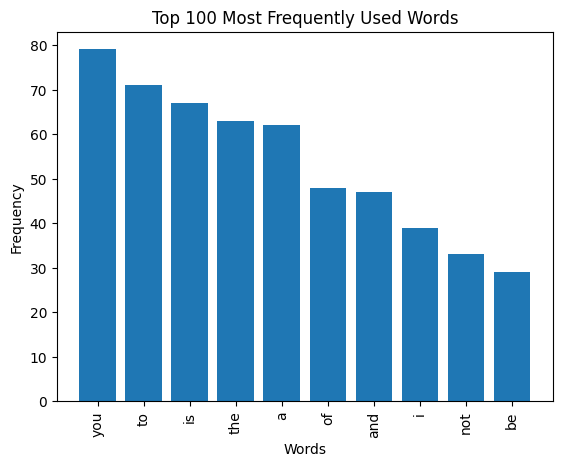

In [38]:
import matplotlib.pyplot as plt
from collections import Counter

# Danh sách các câu nói
sentences = list(meta.Quote)
# Tạo một danh sách các từ từ tất cả các câu nói
words = []
for sentence in sentences:
    words += sentence.lower().split()

# Đếm số lần xuất hiện của từng từ
word_count = Counter(words)

# Lấy 100 từ xuất hiện nhiều nhất
top_words = word_count.most_common(10)

# Tách riêng các từ và tần suất xuất hiện
words, counts = zip(*top_words)

# Tạo biểu đồ cột cho 100 từ có tần suất cao nhất
plt.bar(words, counts)

# Điều chỉnh trục x để cho phép hiển thị tên từng từ
plt.xticks(rotation=90)

# Thêm tiêu đề và nhãn cho trục
plt.title("Top 100 Most Frequently Used Words")
plt.xlabel("Words")
plt.ylabel("Frequency")

# Hiển thị biểu đồ
plt.show()


> ### Vậy những người nổi tiếng có tuổi tập trung ở những khoảng nào ?

In [39]:
import matplotlib.pyplot as plt


{'whiskers': [<matplotlib.lines.Line2D at 0x23e421b5990>,
 'caps': [<matplotlib.lines.Line2D at 0x23e421b5ed0>,
 'boxes': [<matplotlib.lines.Line2D at 0x23e421b56f0>],
 'medians': [<matplotlib.lines.Line2D at 0x23e421b6410>],
 'fliers': [<matplotlib.lines.Line2D at 0x23e421b66b0>],
 'means': []}

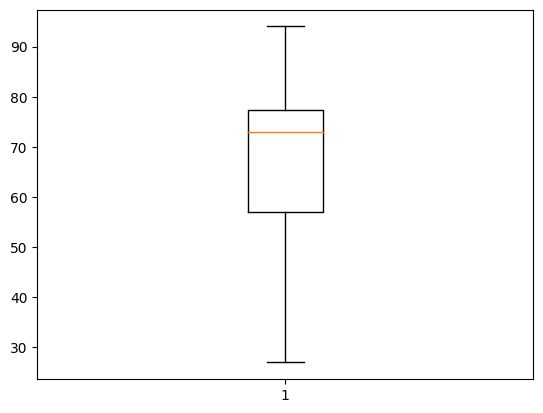

In [40]:
plt.boxplot(meta.Tuoi)

+ Note:
    + Vậy độ tuổi của người nổi tiếng thường tập trung vào khoảng 55 đến 80 tuổi là chủ yếu

> ### Mối quan hệ giữa số lượng câu nói với tuổi của tác giả

In [41]:
meta.head(5)

,Tacgia,Link,Namsinh,Quote,STT,Tuoi,quantity_quotes
0,Albert Einstein,http://quotes.toscrape.com//author/Albert-Eins...,1879-03-14,“The world as we have created it is a process ...,0,76,21
1,J.K. Rowling,http://quotes.toscrape.com//author/J-K-Rowling,1965-07-31,"“It is our choices, Harry, that show what we t...",1,57,16
2,Albert Einstein,http://quotes.toscrape.com//author/Albert-Eins...,1879-03-14,“There are only two ways to live your life. On...,2,76,26
3,Jane Austen,http://quotes.toscrape.com//author/Jane-Austen,1775-12-16,"“The person, be it gentleman or lady, who has ...",3,41,19
4,Marilyn Monroe,http://quotes.toscrape.com//author/Marilyn-Monroe,1926-06-01,"“Imperfection is beauty, madness is genius and...",4,36,16


In [42]:
ages = {}
for i in range(len(meta)):
    ages[meta.Tacgia[i]] = meta.Tuoi[i]

In [43]:
most_author['age'] = most_author.apply(lambda row: int(ages[row.Author]), axis=1)

In [44]:
most_author.head(5)

,Author,Quantily,age
0,Albert Einstein,10,76
26,J.K. Rowling,9,57
37,Marilyn Monroe,7,36
38,Mark Twain,6,74
11,Dr. Seuss,6,87


In [45]:
most_author.age.corr(most_author.Quantily)

-0.1705322647453309

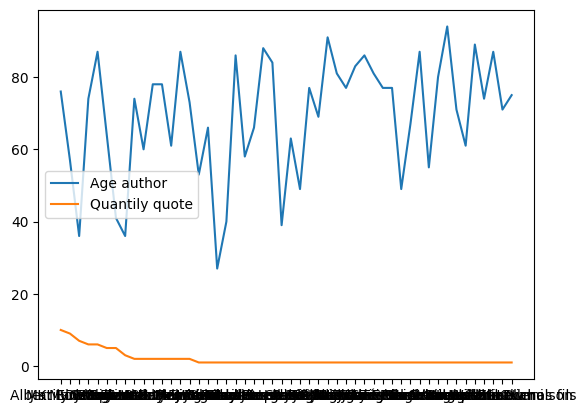

In [46]:
plt.plot(most_author.Author, most_author.age, label='Age author')
plt.plot(most_author.Author, most_author.Quantily, label='Quantily quote')
plt.legend()

+ Note:
    + Việc có nhiều câu nói không phụ thuộc nhiều vào độ tuổi khoảng từ 25 trở lên

# 3.2.3. Trích xuất đặc trưng- Feature Extraction (5 điểm):


In [47]:
# Để phục vụ cho việc phân tích và dự đoán thì các dữ liệu không phải dạng số chúng em sẽ mã hóa hoặc biến đổi về dạng int

> Mã hóa tên tác giả

In [48]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
meta['Tacgia'] = encoder.fit_transform(meta.Tacgia)


In [49]:
# Tiền xử lý dữ liệu
meta['Quote'] = meta['Quote'].str.replace('[^\w\s]','') # Loại bỏ dấu câu và các ký tự đặc biệt
meta['Quote'] = meta['Quote'].str.lower() # Chuyển đổi sang dạng viết thường
stopwords = ['a', 'an', 'the'] # Loại bỏ stopwords
meta['Quote'] = meta['Quote'].apply(lambda x: (' '.join([word for word in x.split() if word not in (stopwords)])).replace('“', '').replace('”', ''))


In [50]:
' '.join([word for word in meta['Quote'][0].split() if word not in (stopwords)])

'world as we have created it is process of our thinking. it cannot be changed without changing our thinking.'

In [51]:
meta['Quote'] = meta['Quote'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords)]))

In [52]:
meta['Quote'][0]

'world as we have created it is process of our thinking. it cannot be changed without changing our thinking.'

In [53]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
vector = vectorizer.fit_transform(meta.Quote)
vectorizer.vocabulary_

{'world': 645,
 'as': 42,
 'we': 621,
 'have': 260,
 'created': 132,
 'it': 305,
 'is': 303,
 'process': 463,
 'of': 416,
 'our': 434,
 'thinking': 562,
 'cannot': 92,
 'be': 55,
 'changed': 104,
 'without': 640,
 'changing': 105,
 'choices': 112,
 'harry': 256,
 'that': 553,
 'show': 500,
 'what': 624,
 'truly': 585,
 'are': 38,
 'far': 202,
 'more': 389,
 'than': 552,
 'abilities': 2,
 'there': 556,
 'only': 424,
 'two': 592,
 'ways': 620,
 'to': 573,
 'live': 341,
 'your': 658,
 'life': 336,
 'one': 422,
 'though': 566,
 'nothing': 412,
 'miracle': 382,
 'other': 433,
 'everything': 187,
 'person': 444,
 'gentleman': 229,
 'or': 430,
 'lady': 323,
 'who': 631,
 'has': 257,
 'not': 411,
 'pleasure': 451,
 'in': 289,
 'good': 240,
 'novel': 414,
 'must': 396,
 'intolerably': 301,
 'stupid': 534,
 'imperfection': 286,
 'beauty': 57,
 'madness': 365,
 'genius': 228,
 'and': 26,
 'better': 70,
 'absolutely': 5,
 'ridiculous': 479,
 'boring': 79,
 'try': 588,
 'become': 59,
 'man': 369,
 

In [58]:
print(vector.toarray().shape)

(100, 661)


In [59]:
meta_encod = pd.concat([meta, pd.DataFrame(vector.toarray())], axis=1)
meta_encod.head(5)

,Tacgia,Link,Namsinh,Quote,STT,Tuoi,quantity_quotes,0,1,2,...,651,652,653,654,655,656,657,658,659,660
0,0,http://quotes.toscrape.com//author/Albert-Eins...,1879-03-14,world as we have created it is process of our ...,0,76,21,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,26,http://quotes.toscrape.com//author/J-K-Rowling,1965-07-31,"it is our choices, harry, that show what we tr...",1,57,16,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,http://quotes.toscrape.com//author/Albert-Eins...,1879-03-14,there are only two ways to live your life. one...,2,76,26,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,30,http://quotes.toscrape.com//author/Jane-Austen,1775-12-16,"person, be it gentleman or lady, who has not p...",3,41,19,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,37,http://quotes.toscrape.com//author/Marilyn-Monroe,1926-06-01,"imperfection is beauty, madness is genius and ...",4,36,16,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [60]:
meta_encod.drop(['Quote', 'Link', 'STT', 'Namsinh', 'Tuoi'], axis=1, inplace=True)

In [61]:
meta_encod.drop(['quantity_quotes'], axis=1, inplace=True)

In [62]:
meta_encod

,Tacgia,0,1,2,3,4,5,6,7,8,...,651,652,653,654,655,656,657,658,659,660
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,26,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,30,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,37,0,0,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,22,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,3,0,0,0,0
96,36,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,2,0,0,0,0
97,38,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
98,11,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


> Hiển thị độ tương quan 

In [63]:
meta_encod.corr()['Tacgia'][0]

0.16766980399011286

In [64]:
meta_encod.corr()

,Tacgia,0,1,2,3,4,5,6,7,8,...,651,652,653,654,655,656,657,658,659,660
Tacgia,1.000000,0.167670,0.167670,0.024304,-0.071115,0.024304,0.099400,0.133535,-0.023485,0.024304,...,-0.050792,0.092573,0.017477,-0.105408,-0.153197,-0.032832,-0.078100,0.096371,0.017477,-0.005752
0,0.167670,1.000000,1.000000,-0.010101,-0.019342,-0.010101,-0.010101,-0.010101,-0.010101,-0.010101,...,-0.010101,-0.010101,-0.010101,-0.010101,-0.010101,-0.052492,-0.010101,-0.025392,-0.010101,-0.019342
1,0.167670,1.000000,1.000000,-0.010101,-0.019342,-0.010101,-0.010101,-0.010101,-0.010101,-0.010101,...,-0.010101,-0.010101,-0.010101,-0.010101,-0.010101,-0.052492,-0.010101,-0.025392,-0.010101,-0.019342
2,0.024304,-0.010101,-0.010101,1.000000,-0.019342,-0.010101,-0.010101,-0.010101,-0.010101,-0.010101,...,-0.010101,-0.010101,-0.010101,-0.010101,-0.010101,-0.052492,-0.010101,-0.025392,-0.010101,-0.019342
3,-0.071115,-0.019342,-0.019342,-0.019342,1.000000,-0.019342,-0.019342,-0.019342,-0.019342,-0.019342,...,-0.019342,-0.019342,-0.019342,-0.019342,-0.019342,0.426457,-0.019342,0.275523,-0.019342,0.703704
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
656,-0.032832,-0.052492,-0.052492,-0.052492,0.426457,-0.052492,-0.052492,0.151361,-0.052492,-0.001529,...,-0.001529,0.049434,0.151361,0.049434,0.049434,1.000000,0.100398,0.579774,0.151361,0.231282
657,-0.078100,-0.010101,-0.010101,-0.010101,-0.019342,-0.010101,-0.010101,-0.010101,-0.010101,-0.010101,...,-0.010101,-0.010101,-0.010101,-0.010101,-0.010101,0.100398,1.000000,-0.025392,-0.010101,-0.019342
658,0.096371,-0.025392,-0.025392,-0.025392,0.275523,-0.025392,-0.025392,0.115674,-0.025392,-0.025392,...,-0.025392,-0.025392,-0.025392,0.256740,-0.025392,0.579774,-0.025392,1.000000,-0.025392,0.275523
659,0.017477,-0.010101,-0.010101,-0.010101,-0.019342,-0.010101,-0.010101,-0.010101,-0.010101,-0.010101,...,-0.010101,-0.010101,1.000000,-0.010101,-0.010101,0.151361,-0.010101,-0.025392,1.000000,-0.019342


Text(0.5, 1.0, 'Correlation Heatmap')

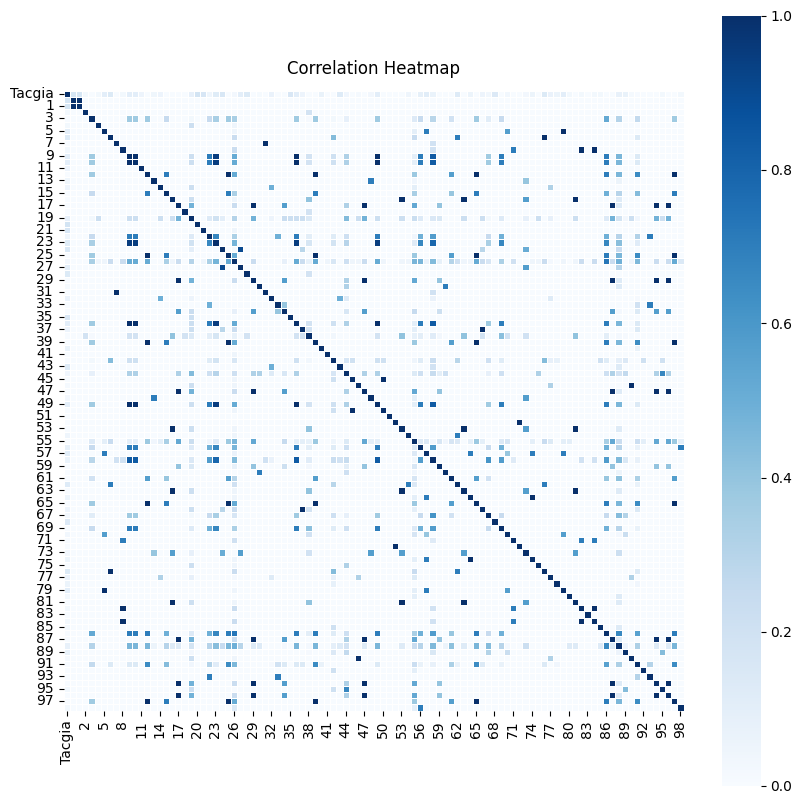

In [65]:
plt.figure(figsize=(10, 10))
heatmap = sns.heatmap(meta_encod[meta_encod.columns[:100]].corr(), linewidths=0.5, vmax=1.0, vmin=0, 
                      square=True, cmap="Blues", linecolor='white')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize': 12}, pad=12)


> Chọn features và target

In [66]:
features = meta_encod.columns.drop('Tacgia')
target = 'Tacgia'

In [67]:
features

Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
       ...
       651, 652, 653, 654, 655, 656, 657, 658, 659, 660],
      dtype='object', length=661)

# 3.2.4. Suy luận (15 điểm): 


In [86]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.neighbors import KNeighborsClassifier

from sklearn import svm

Split theo cach 1: Lấy 50 dòng của đủ 50 tác giả + với 30 dòng còn lại random

In [87]:
id_author = meta_encod.Tacgia.unique()
len(id_author)

50

In [88]:
X_train = pd.DataFrame(columns=features)
X_train

,0,1,2,3,4,5,6,7,8,9,...,651,652,653,654,655,656,657,658,659,660


In [89]:
y_train = []

In [90]:
id_used = []

In [91]:
id = 0
for i in id_author:
    d = meta_encod[meta_encod.Tacgia == i].sample(n=1, random_state=42).index[0]
    X_train.loc[id] = meta_encod.loc[d][1:].values
    y_train.append(meta_encod.loc[d][0])
    # print(meta_encod.loc[d][1:])
    # print(len(d[features].values))
    id_used.append(d)
    id+=1
    

In [92]:
remain_data = meta_encod[~meta_encod.index.isin(id_used)]

In [93]:
train = remain_data.sample(n=30, random_state=42)
X_train = pd.concat([X_train, train[features]])
y_train.extend(list(train.Tacgia.values))


In [94]:
id_used.extend(list(train.index))

In [95]:
remain_data = meta_encod[~meta_encod.index.isin(id_used)]
len(remain_data)

20

In [96]:
X_test = remain_data[features]
y_test = list(remain_data.Tacgia.values)

Split theo cách thuần túy

In [97]:
# X_train, X_test, y_train, y_test = train_test_split(meta_encod[features], meta_encod[target], test_size = 0.2, random_state = 42)

In [98]:
class Mode:
    def __init__(self, model, name_model):
        self.model = model
        self.name_model = name_model
        self.X_train, self.X_test, self.y_train, self.y_test = X_train, X_test, y_train, y_test

    def process_model(self):
        self.model.fit(self.X_train, self.y_train)
        y_pred_en = self.model.predict(self.X_test)
    
        print(f'Model {self.name_model} accuracy score = {accuracy_score(self.y_test, y_pred_en)}')

In [99]:
Modes = [
    (DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0), 'Decision-Tree'),
    (RandomForestClassifier(n_estimators=50, random_state=42), 'Random Forest'),
    (svm.SVC(kernel='linear'), 'SVM'),
    (KNeighborsClassifier(n_neighbors=50), 'KNN')
]

In [100]:
for mode in Modes:
    m =Mode(mode[0], mode[1])
    m.process_model()


Model Decision-Tree accuracy score = 0.2
Model Random Forest accuracy score = 0.2
Model SVM accuracy score = 0.1
Model KNN accuracy score = 0.2


### - Hãy đề xuất cách tính độ tương đồng phong cách nói giữa các tác giả và tìm ra các tác giả có phong cách nói tương đồng nhau nhất? (5 điểm)

+ Đối với câu hỏi này thì để đánh giá được phong cách thì chính là đánh giá về mức độ trùng nhau giữa các câu chữ của 2 tác giả

In [101]:
from sklearn.metrics.pairwise import cosine_similarity

In [102]:
similarity_matrix = cosine_similarity(vector)

In [103]:


# Chuyển đổi các giá trị đã mã hóa trở lại giá trị gốc
meta['Tacgia'] = encoder.inverse_transform(meta['Tacgia'])
meta

,Tacgia,Link,Namsinh,Quote,STT,Tuoi,quantity_quotes
0,Albert Einstein,http://quotes.toscrape.com//author/Albert-Eins...,1879-03-14,world as we have created it is process of our ...,0,76,21
1,J.K. Rowling,http://quotes.toscrape.com//author/J-K-Rowling,1965-07-31,"it is our choices, harry, that show what we tr...",1,57,16
2,Albert Einstein,http://quotes.toscrape.com//author/Albert-Eins...,1879-03-14,there are only two ways to live your life. one...,2,76,26
3,Jane Austen,http://quotes.toscrape.com//author/Jane-Austen,1775-12-16,"person, be it gentleman or lady, who has not p...",3,41,19
4,Marilyn Monroe,http://quotes.toscrape.com//author/Marilyn-Monroe,1926-06-01,"imperfection is beauty, madness is genius and ...",4,36,16
...,...,...,...,...,...,...,...
95,Harper Lee,http://quotes.toscrape.com//author/Harper-Lee,1926-04-28,you never really understand person until you c...,95,89,27
96,Madeleine L'Engle,http://quotes.toscrape.com//author/Madeleine-L...,1918-11-29,you have to write book that wants to be writte...,96,88,27
97,Mark Twain,http://quotes.toscrape.com//author/Mark-Twain,1835-11-30,never tell truth to people who are not worthy ...,97,74,12
98,Dr. Seuss,http://quotes.toscrape.com//author/Dr-Seuss,1904-03-02,"person's person, no matter how small.",98,87,8


In [104]:
# Tìm tác giả có phong cách nói tương đồng nhau nhất
authors = meta['Tacgia'].unique()
max_similarity = 0
most_similar_authors = []

for i, author1 in enumerate(authors):
    for j, author2 in enumerate(authors):
        if i >= j:
            continue
        similarity = similarity_matrix[i][j]
        if similarity >= max_similarity:
            max_similarity = similarity
            most_similar_authors.append((author1, author2))
     

print(f"The most similar authors with similarity score of {max_similarity}")
for i in most_similar_authors:
    print(i)

The most similar authors with similarity score of 0.5184758473652127
('Albert Einstein', 'J.K. Rowling')
('Jane Austen', 'C.S. Lewis')
('Eleanor Roosevelt', 'Helen Keller')
('Eleanor Roosevelt', 'J.D. Salinger')
